## 1日の中で時間ごとの歩数の遷移をモデル化する

In [98]:
%matplotlib inline
import random
import numpy
import matplotlib.pylab as plt

In [195]:
#完歩の人と未完の人のデータを読み込む
with open('kampo_list.pickle', mode='rb') as f:
    walk_result = pickle.load(f)

### 杉山先生がランダム9人の10日間の歩数を時間ごとに出してはった

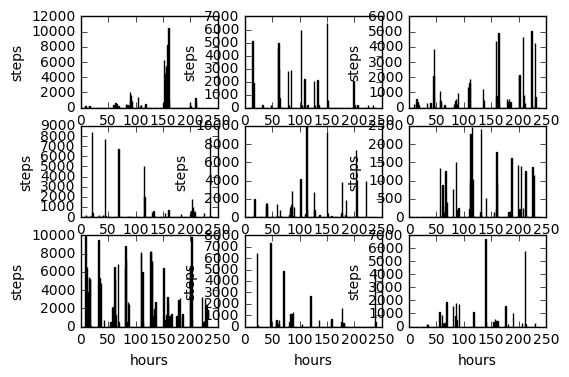

In [82]:
f = open('datasets.npz', 'rb')
dataset = numpy.load(f)
X = dataset['all']

f, axes = plt.subplots(3, 3)
for i in range(3):
    for j in range(3):
        datasets = X[random.randint(0, X.shape[0] - 1)]
        # print 'dataset: ', dataset
        axes[i][j].bar(xrange(240), datasets)
        axes[i][j].set_xlabel('hours')
        axes[i][j].set_ylabel('steps')
plt.show()

### 1日の中で1時間ごとの歩数のヒストグラムを作成

In [159]:
#print X.shape
#daily_steps = X
daily_step = X[:, :24]
#print daily_step.shape
daily_steps = daily_step[daily_step != 0.0]
#daily_steps.reshape(-1,)
#numpy.ravel(daily_steps)
#print daily_steps.shape

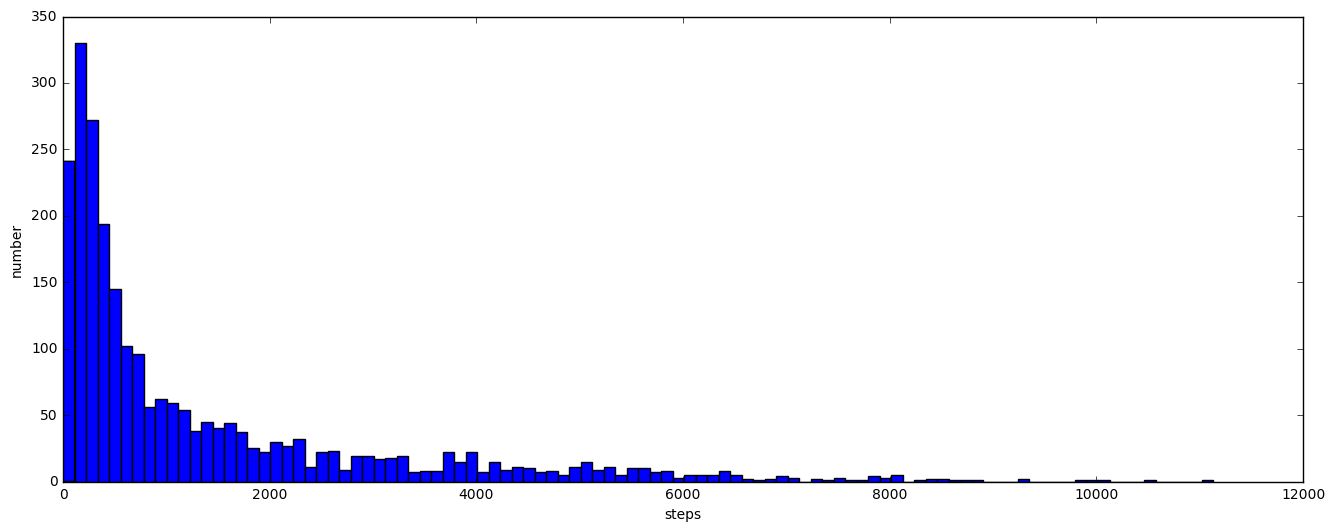

In [168]:
plt.figure(figsize=(16,6))
plt.hist(daily_steps, bins=100)
plt.xlabel('steps')
plt.ylabel('number')
#plt.xticks([156, 495, 1008, 1717, 2742, 4030, 5609, 8166])
plt.show()

In [92]:
print numpy.max(daily_steps)

11130.3


### 歩数を人の状態として捉えるためにK-meansでクラスタリング

In [192]:
import scipy.cluster

daily_step_1d = daily_step.reshape((-1, ))
print daily_step_1d.shape
#とりあえずk=8でやる
codebook, destortion = scipy.cluster.vq.kmeans(daily_steps, 8)
#codebook, destortion = scipy.cluster.vq.kmeans(daily_step_1d, 8)
codebook = numpy.sort(codebook)
print codebook

code, dist = scipy.cluster.vq.vq(daily_steps, codebook)

print code, dist

(16896,)
[  157.30059814   496.86447144  1009.48907471  1717.4432373   2742.51879883
  4030.87841797  5609.21582031  8166.65234375]
[0 2 0 ..., 0 2 5] [  56.69940186  144.0602417   154.84996033 ...,  128.69940186  139.48907471
    9.87841797]


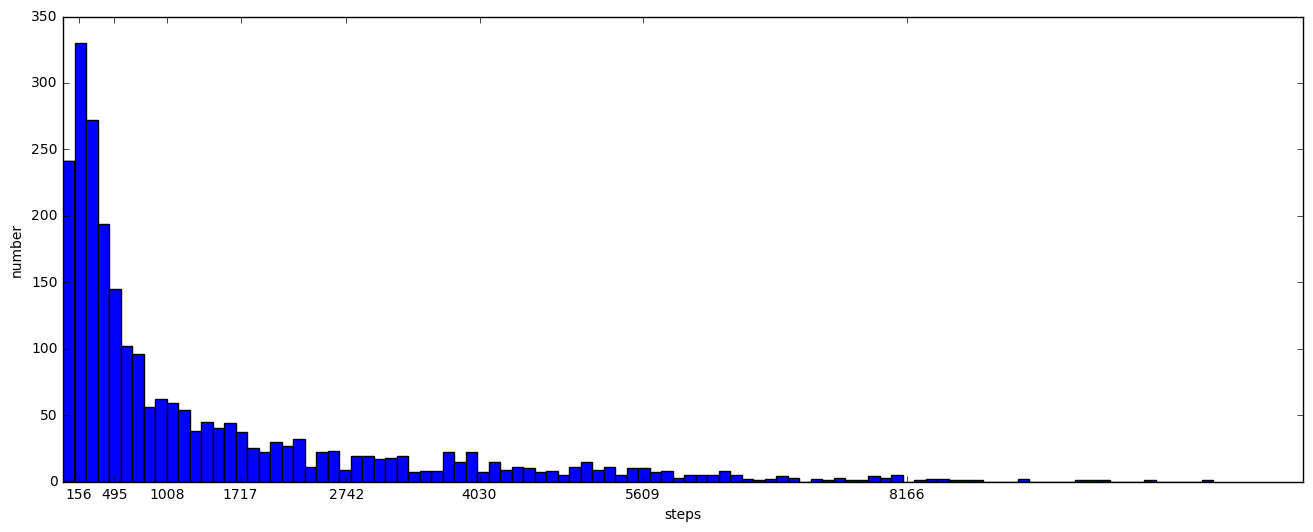

In [191]:
plt.figure(figsize=(16,6))
plt.hist(daily_steps, bins=100)
plt.xlabel('steps')
plt.ylabel('number')
plt.xticks([156, 495, 1008, 1717, 2742, 4030, 5609, 8166])
plt.show()

In [193]:
man_daily = daily_step[:1, :]
print man_daily

[[   0.  214.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
     0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.]]
